<a href="https://colab.research.google.com/github/srao010/Reinforcement-Learning/blob/main/n_arm_bandit_UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

25 August, 2022

20csu284

Sanya Rao

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Ads_Optimisation.csv')

In [4]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [6]:
import random
N = 10000 #sample
d = 10 #no. of ads
ads_selected = []
total_reward = 0
for n in range (0, N):
  ad = random.randrange(d)
  ads_selected.append(ad)
  reward = df.values[n, ad]
  total_reward = total_reward + reward

In [7]:
pd.Series(ads_selected).head(100).value_counts(normalize=True)

1    0.13
8    0.13
5    0.13
0    0.13
6    0.10
3    0.10
9    0.10
4    0.09
2    0.05
7    0.04
dtype: float64

In [13]:
# implementing ucb
import math
N= len(df)
d= len(df.columns)
ads_selected= []
number_of_selections = [0] * d
sum_of_rewards= [0] * d
total_reward= 0



for n in range(0, N):
  ad= 0
  max_upper_bound= 0

  for i in range(0, d):
    if(number_of_selections[i] > 0):
      avg_reward= sum_of_rewards[i]/number_of_selections[i]
      del_i= math.sqrt(3/2 * math.log(n+1) / number_of_selections[i])
      upper_bound= avg_reward + del_i
    else:
      upper_bound= 1e400
      if upper_bound > max_upper_bound:
        max_upper_bound= upper_bound
        ad= i
    ads_selected.append(ad)
    number_of_selections[ad]= number_of_selections[ad] + 1
    reward= df.values[n, ad]
    sum_of_rewards[ad]= sum_of_rewards[ad] + reward
    total_reward= total_reward + reward

In [14]:
total_reward

17022

Text(0, 0.5, 'Number of times each ad was selected by the algorithm')

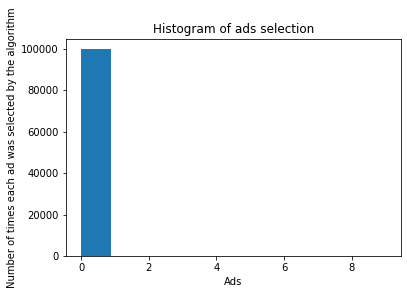

In [15]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected by the algorithm')

In [16]:
pd.Series(ads_selected).tail(10000).value_counts(normalize=True)

0    1.0
dtype: float64